<a href="https://colab.research.google.com/github/PrachiHarish/ML-Projects/blob/main/Copy_of_Linear_Regression_(House_Price_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/house_sales_data.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: xlabel='price', ylabel='Density'>

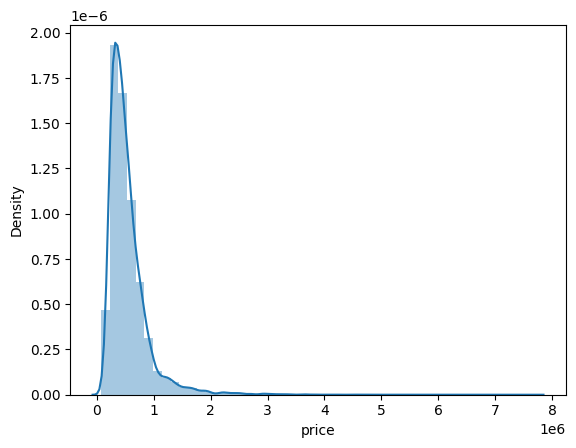

In [ ]:
sns.distplot(data["price"])

<Axes: xlabel='price', ylabel='Density'>

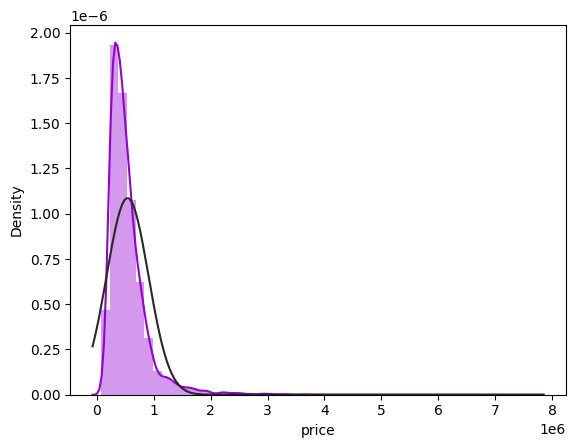

In [ ]:
from scipy.stats import norm
sns.distplot(data["price"],fit=norm,color="darkviolet")

<Axes: >

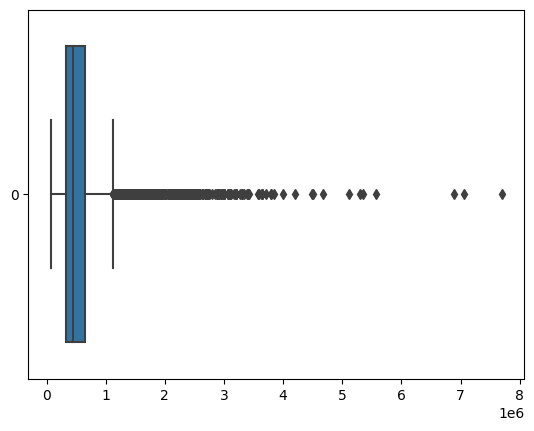

In [ ]:
sns.boxplot(data["price"],orient="h")

In [ ]:
data=data.drop(["id","date"],axis=1)

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(data))

In [ ]:
np.where(z > 4)

(array([    1,     5,    21, ..., 21576, 21576, 21576]),
 array([13, 17,  7, ...,  0,  6,  7]))

In [ ]:
len(np.where(z > 4)[0]) / data.shape[0]

0.11696664044787859

In [ ]:
np.where(z > 4)[0] # row indexes with outliers

array([    1,     5,    21, ..., 21576, 21576, 21576])

In [ ]:
data=data.drop(np.where(z > 4)[0],axis=0)

<Axes: xlabel='price', ylabel='Density'>

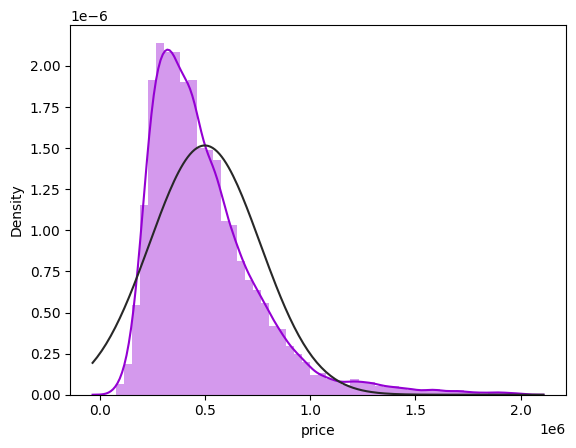

In [ ]:
from scipy.stats import norm
sns.distplot(data["price"],fit=norm,color="darkviolet")

<Axes: >

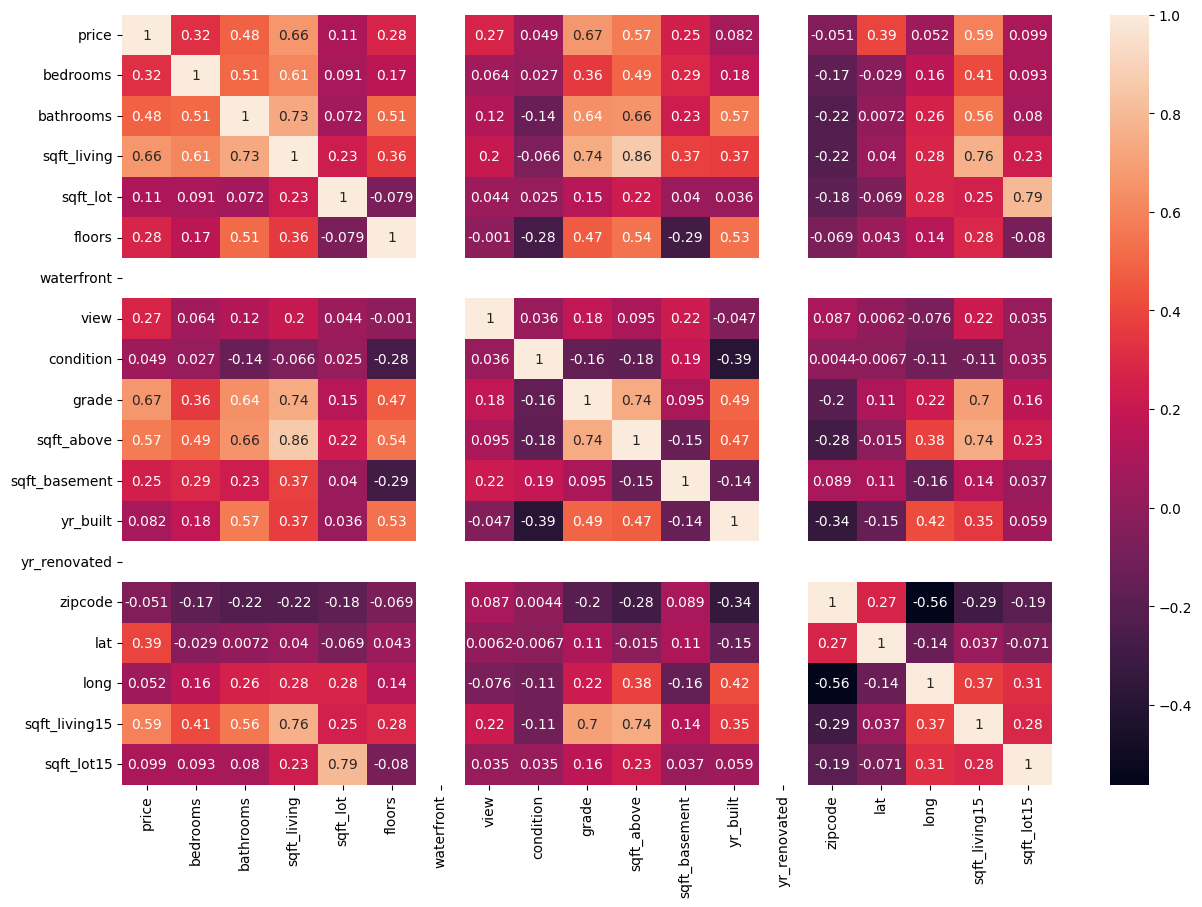

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

<Axes: >

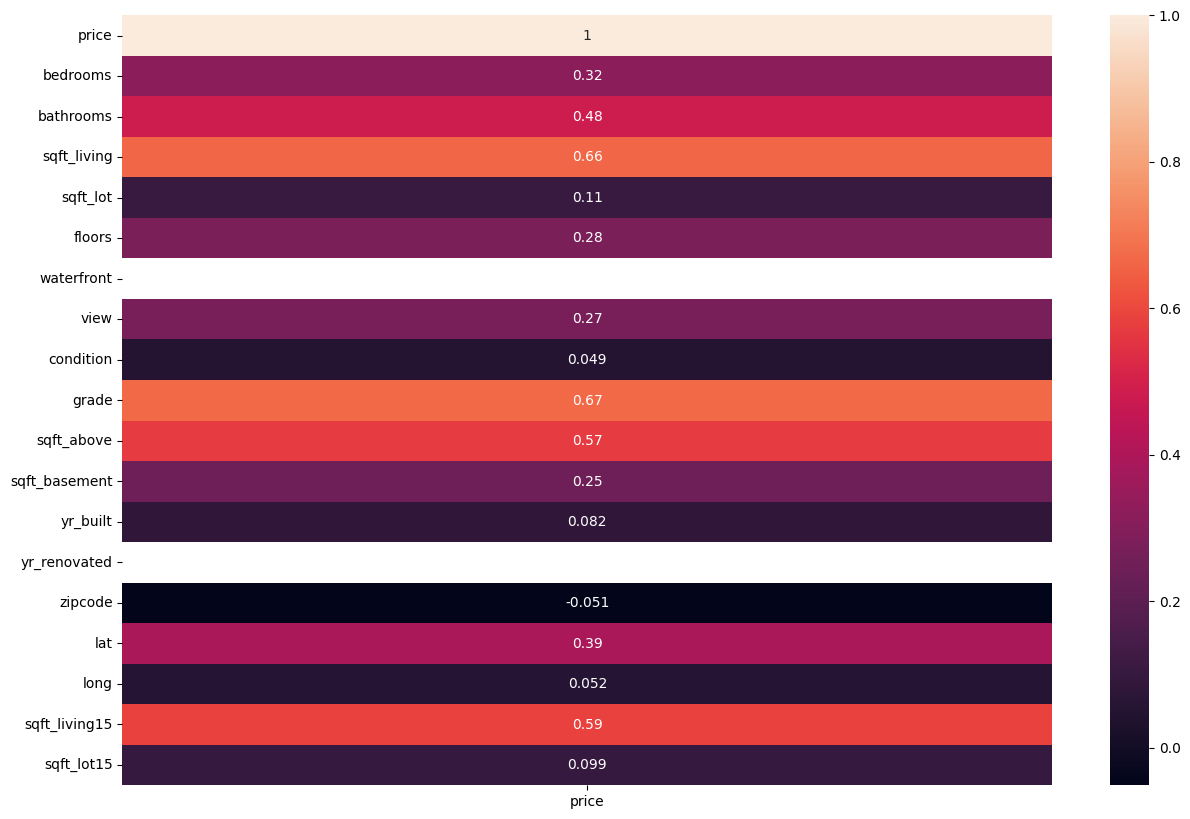

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr()[["price"]],annot=True)

In [ ]:
x=data.drop(["waterfront","yr_built","yr_renovated","zipcode","long","sqft_lot","price"],axis=1)
y=data["price"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.285714,0.20,0.091429,0.0,0.000000,0.50,0.333333,0.102564,0.000000,0.533599,0.150943,0.044410
1,0.428571,0.20,0.146667,0.0,0.000000,1.00,0.333333,0.164530,0.000000,0.499667,0.117925,0.054373
2,0.428571,0.40,0.213333,0.0,0.000000,0.75,0.444444,0.239316,0.000000,0.820526,0.292453,0.058732
3,0.428571,0.50,0.325714,0.4,0.000000,0.50,0.555556,0.365385,0.000000,0.215236,0.518868,0.076466
4,0.714286,0.45,0.598095,0.0,0.666667,0.50,0.555556,0.316239,0.805825,0.674152,0.523585,0.067242
...,...,...,...,...,...,...,...,...,...,...,...,...
15843,0.428571,0.30,0.196190,0.0,0.000000,0.50,0.444444,0.220085,0.000000,0.461078,0.193396,0.059952
15844,0.428571,0.35,0.152381,0.0,0.000000,0.50,0.444444,0.170940,0.000000,0.318530,0.169811,0.059902
15845,0.428571,0.50,0.386667,0.4,0.000000,0.50,0.555556,0.433761,0.000000,0.542914,0.214623,0.304028
15846,0.571429,0.70,0.661905,0.4,0.000000,0.50,0.777778,0.742521,0.000000,0.763473,0.294811,0.064336


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.score(x_test,y_test) #r2 score

0.6746348853797146

In [ ]:
yhat=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
# coeff of determination
 # 1 - RSS / TSS, RSS(Sum of Squared Residual) (y - yhat) , (y - ymean)
 # TSS = Variance b/w actual sample from its mean Y
r2_score(y_test, yhat)

0.6746348853797146

In [ ]:
mean_absolute_error(y_test,yhat)

106666.76534106451

In [ ]:
np.sqrt(mean_squared_error(y_test,yhat))

153556.35383430237

In [ ]:
y.mean()

499585.7332290142

In [ ]:
model.intercept_

-423389.24001758697

In [ ]:
model.coef_

array([ -95010.14389376,  -51395.29540098,  306946.59722575,
         10282.81700239,  158912.55839612,  218577.07117207,
        705952.71725803,  291147.60205428,  120824.6882627 ,
        379887.64315573,  164683.11689924, -119062.59374978])